### mini-ensemble of CESM2-4p2z historical + ssp370

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np

import ncar_jobqueue
from dask.distributed import Client

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import pop_tools 

#import cftime
import matplotlib.colors as colors
import utils

###  specify desired variables

In [4]:
variables = ['photoC_TOT_zint_100m','POC_FLUX_100m','IFRAC']

### Grab the first ensemble member (002) - this one goes from 1850 to 2014 (hist) and 2015 to 2100 (ssp)

#### Get historical part

In [5]:
case = 'b.e21p4.BHIST.f09_g17.4p2z.002'
path = '/glade/campaign/cesm/development/bgcwg/projects/CESM2-4p2z-CMIP6-like-run/' + case + '/ocn/proc/tseries/month_1/'

In [6]:
ds_hist = xr.Dataset()
#ds_fosi_seas = xr.Dataset()

for var in variables:
    
    print('starting on ', var)
    ################ FOSI
    
    files = sorted(glob(f'{path}/{case}.pop.h.{var}.??????-??????.nc'))  
    
    ds_tmp = xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time", combine='nested',
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    
    keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var]

    ds_tmp = ds_tmp.drop([v for v in ds_tmp.variables if v not in keep_vars])
    
    ds_hist = xr.merge([ds_hist,ds_tmp],combine_attrs='override')

starting on  photoC_TOT_zint_100m
starting on  POC_FLUX_100m
starting on  IFRAC


#### Get future part

In [7]:
case = 'b.e21p4.BSSP370.f09_g17.4p2z.002'
path = '/glade/campaign/cesm/development/bgcwg/projects/CESM2-4p2z-CMIP6-like-run/' + case + '/ocn/proc/tseries/month_1/'

In [8]:
ds_ssp = xr.Dataset()
#ds_fosi_seas = xr.Dataset()

for var in variables:
    
    print('starting on ', var)
    ################ FOSI
    
    files = sorted(glob(f'{path}/{case}.pop.h.{var}.??????-??????.nc'))  
    
    ds_tmp = xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time", combine='nested',
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    
    keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var]

    ds_tmp = ds_tmp.drop([v for v in ds_tmp.variables if v not in keep_vars])
    
    ds_ssp = xr.merge([ds_ssp,ds_tmp],combine_attrs='override')

starting on  photoC_TOT_zint_100m
starting on  POC_FLUX_100m
starting on  IFRAC


### concat hist and ssp

In [9]:
ds1 = xr.concat([ds_hist,ds_ssp],dim='time')

### Now grab ensemble member 003

#### historical part

In [10]:
case = 'b.e21p5.BHIST.f09_g17.4p2z.003'
path = '/glade/campaign/cesm/development/bgcwg/projects/CESM2-4p2z-CMIP6-like-run/' + case + '/ocn/proc/tseries/month_1/'

In [11]:
ds_hist = xr.Dataset()
#ds_fosi_seas = xr.Dataset()

for var in variables:
    
    print('starting on ', var)
    ################ FOSI
    
    files = sorted(glob(f'{path}/{case}.pop.h.{var}.??????-??????.nc'))  
    
    ds_tmp = xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time", combine='nested',
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    
    keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var]

    ds_tmp = ds_tmp.drop([v for v in ds_tmp.variables if v not in keep_vars])
    
    ds_hist = xr.merge([ds_hist,ds_tmp],combine_attrs='override')

starting on  photoC_TOT_zint_100m
starting on  POC_FLUX_100m
starting on  IFRAC


#### future part

In [12]:
case = 'b.e21p5.BSSP370.f09_g17.4p2z.003'
path = '/glade/campaign/cesm/development/bgcwg/projects/CESM2-4p2z-CMIP6-like-run/' + case + '/ocn/proc/tseries/month_1/'

In [13]:
ds_ssp = xr.Dataset()
#ds_fosi_seas = xr.Dataset()

for var in variables:
    
    print('starting on ', var)
    ################ FOSI
    
    files = sorted(glob(f'{path}/{case}.pop.h.{var}.??????-??????.nc'))  
    
    ds_tmp = xr.open_mfdataset(files, data_vars="minimal", coords='minimal', compat="override", parallel=True, concat_dim="time", combine='nested',
                       drop_variables=["transport_components", "transport_regions"], decode_times=True)
    
    
    keep_vars=['z_t','z_t_150m','time_bound','dz','TLAT','TLONG','time'] + [var]

    ds_tmp = ds_tmp.drop([v for v in ds_tmp.variables if v not in keep_vars])
    
    ds_ssp = xr.merge([ds_ssp,ds_tmp],combine_attrs='override')

starting on  photoC_TOT_zint_100m
starting on  POC_FLUX_100m
starting on  IFRAC


### concat hist and ssp for 003

In [14]:
ds2 = xr.concat([ds_hist,ds_ssp],dim='time')

### fix the time dimension and then trim them so they both start in 1920

In [15]:
ds1['time'] = ds1.time_bound.compute().mean(dim="d2")
ds2['time'] = ds2.time_bound.compute().mean(dim="d2")

In [16]:
ds1.time[840:3012]

<xarray.DataArray 'time' (time: 2172)>
array([cftime.DatetimeNoLeap(1920, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1920, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1920, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1920-01-16 12:00:00 ... 2100-12-16 12:00:00

In [17]:
ds2.time[48:2220]

<xarray.DataArray 'time' (time: 2172)>
array([cftime.DatetimeNoLeap(1920, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1920, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1920, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1920-01-16 12:00:00 ... 2100-12-16 12:00:00

In [18]:
ds1 = ds1.isel(time=slice(840,3012))

In [19]:
ds2 = ds2.isel(time=slice(48,2220))

In [20]:
ds1.time

<xarray.DataArray 'time' (time: 2172)>
array([cftime.DatetimeNoLeap(1920, 1, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(1920, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(1920, 3, 16, 12, 0, 0, 0), ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1920-01-16 12:00:00 ... 2100-12-16 12:00:00

In [21]:
ds2['time'] = ds1.time

### Now both datasets are the same length, so let's try merging them, creating a 'member_id' dimension

In [22]:
ds = xr.concat([ds1,ds2],dim='member_id')

### clean things up a bit

In [23]:
ds['TLONG'] = ds.TLONG.isel(member_id=0).squeeze()
ds['TLAT'] = ds.TLAT.isel(member_id=0).squeeze()

In [24]:
ds

<xarray.Dataset>
Dimensions:               (d2: 2, member_id: 2, nlat: 384, nlon: 320, time: 2172, z_t: 60, z_t_150m: 15)
Coordinates:
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
    TLONG                 (nlat, nlon) float64 320.6 321.7 322.8 ... 319.4 319.8
    TLAT                  (nlat, nlon) float64 -79.22 -79.22 ... 72.19 72.19
  * time                  (time) object 1920-01-16 12:00:00 ... 2100-12-16 12...
Dimensions without coordinates: d2, member_id, nlat, nlon
Data variables:
    dz                    (member_id, time, z_t) float32 dask.array<chunksize=(1, 1140, 60), meta=np.ndarray>
    time_bound            (member_id, time, d2) object dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    photoC_TOT_zint_100m  (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 360, 384, 320), meta=np.ndarray>
    POC_FLUX_100m         (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 360, 384, 320), meta=np.ndarray>
    IFRAC                 (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 360, 384, 320), meta=np.ndarray>

### Now spin up a cluster and do some analysis

In [25]:
def get_ClusterClient():
    import dask
    from dask_jobqueue import PBSCluster
    from dask.distributed import Client
    cluster = PBSCluster(
        cores=2,
        memory='20 GB',
        processes=1,
        queue='casper',
        resource_spec='select=1:ncpus=1:mem=20GB',
        project='NCGD0011',
        walltime='05:00:00',
        interface='ext',)

    dask.config.set({
        'distributed.dashboard.link':
        'https://jupyterhub.hpc.ucar.edu/stable/user/{USER}/proxy/{port}/status'
    })
    client = Client(cluster)
    return cluster, client

In [26]:
cluster, client = get_ClusterClient()
cluster.scale(18) 
client

Client Scheduler: tcp://128.117.208.85:45415 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kristenk/proxy/39367/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


### get coords and make a ones array for masking

In [27]:
ds_grid = pop_tools.get_grid('POP_gx1v7')
lats = ds_grid.TLAT
lons = ds_grid.TLONG
area = ds_grid.TAREA
area_m = area * 1.e-4
area_km = area * 1.e-10
lons_norm = utils.normal_lons(lons)

In [28]:
ones = np.full((384,320),1,dtype=int)
ones = xr.DataArray(ones,dims=('nlat','nlon'))
ones = ones.where(ds_grid.REGION_MASK>0)

In [29]:
ds

<xarray.Dataset>
Dimensions:               (d2: 2, member_id: 2, nlat: 384, nlon: 320, time: 2172, z_t: 60, z_t_150m: 15)
Coordinates:
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
    TLONG                 (nlat, nlon) float64 320.6 321.7 322.8 ... 319.4 319.8
    TLAT                  (nlat, nlon) float64 -79.22 -79.22 ... 72.19 72.19
  * time                  (time) object 1920-01-16 12:00:00 ... 2100-12-16 12...
Dimensions without coordinates: d2, member_id, nlat, nlon
Data variables:
    dz                    (member_id, time, z_t) float32 dask.array<chunksize=(1, 1140, 60), meta=np.ndarray>
    time_bound            (member_id, time, d2) object dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    photoC_TOT_zint_100m  (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 360, 384, 320), meta=np.ndarray>
    POC_FLUX_100m         (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 360, 384, 320), meta=np.ndarray>
    IFRAC                 (member_id, time, nlat, nlon) float32 dask.array<chunksize=(1, 360, 384, 320), meta=np.ndarray>

### Create a SIZ mask using seasonal average JJA (I'll make DJF and SON too, just in case)

In [30]:
ds_djf = xr.Dataset()
ds_jja = xr.Dataset() # for calculating SIZ mask, whether or not the wintertime ifrac makes a big difference for the following growing season
ds_son = xr.Dataset()

sp = 8 # sept index , rearing period (rp)
i = 5 # june index for jja averages
s = 11 #december index for djf averages, summer (s)

for year in np.arange(0,180,1):
        
        #print(year,sp,s,i)
    
        
        ### JJA
        jja = ds.isel(time=slice(i,i+3)).mean(dim='time')

        ds_jja = xr.concat([ds_jja,jja],dim='time')

        i = i + 12
        
                
        ### SON
        son = ds.isel(time=slice(sp,sp+3)).mean(dim='time')

        ds_son = xr.concat([ds_son,son],dim='time')

        sp = sp + 12
        
                        
        ### DJF
        djf = ds.isel(time=slice(s,s+3)).mean(dim='time')

        ds_djf = xr.concat([ds_djf,djf],dim='time')

        s = s + 12


ds_djf['time'] = np.arange(1920,2100,1)
ds_son['time'] = np.arange(1920,2100,1)
ds_jja['time'] = np.arange(1920,2100,1)

### Let's make some timeseries figure, just use SIZ as as example mask

#### define Antarctic SIZ as JJA ifrac > 0.85 over the mean over the first 10 years of the run (1920-1929)

In [31]:
SIZ_mask = ones.where(ds_jja.IFRAC.isel(time=slice(0,10)).mean(dim=('time','member_id')) > 0.85).where(lats<0)

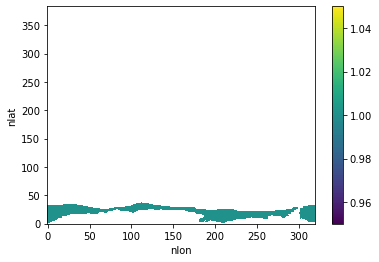

In [32]:
SIZ_mask.plot()

In [33]:
ts_siz_djf = xr.Dataset()
ts_siz_son = xr.Dataset()


for var in variables:
    
    print(var)

    masked_area = area.where(SIZ_mask==1)

    ### DJF
    masked_var = ds_djf[var].where(SIZ_mask==1)
    ts_siz_djf[var] = (masked_var * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))

    ### SON
    masked_var = ds_son[var].where(SIZ_mask==1)
    ts_siz_son[var] = (masked_var * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))

photoC_TOT_zint_100m
POC_FLUX_100m
IFRAC


In [34]:
ts_siz_djf['time'] = np.arange(1920,2100,1)
ts_siz_son['time'] = np.arange(1920,2100,1)

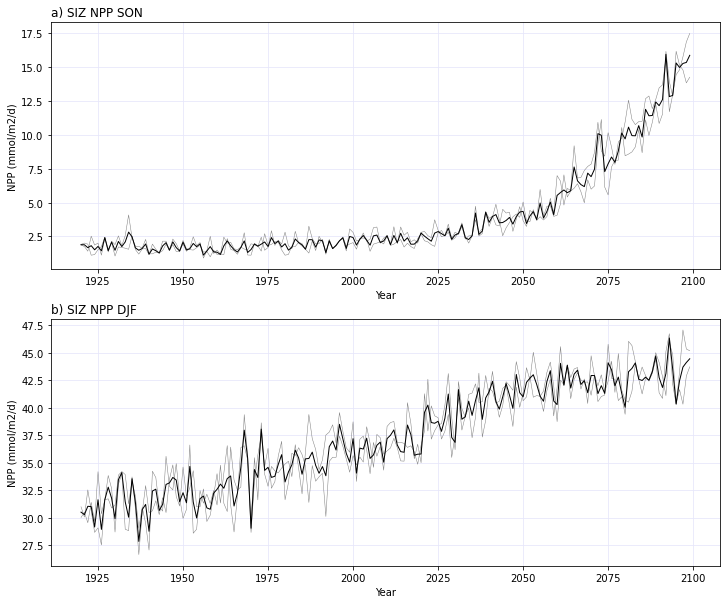

In [35]:
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(2,1,1)
ax.set_title('a) SIZ NPP SON', loc='left')

for mem in np.arange(0,2,1):
    ax.plot(ts_siz_son['time'], ts_siz_son['photoC_TOT_zint_100m'].isel(member_id=mem)*86400.*0.01,linewidth=0.5,color='gray')
    
ax.plot(ts_siz_son['time'], ts_siz_son['photoC_TOT_zint_100m'].mean(dim='member_id')*86400.*0.01,linewidth=1,color='black')
        
ax.set(ylabel='NPP (mmol/m2/d)',xlabel='Year');
ax.xaxis.grid(True, which='major',color='lavender')
ax.yaxis.grid(False, which='major',color='lavender');
#############################3
ax = fig.add_subplot(2,1,2)
ax.set_title('b) SIZ NPP DJF', loc='left')

for mem in np.arange(0,2,1):
    ax.plot(ts_siz_djf['time'], ts_siz_djf['photoC_TOT_zint_100m'].isel(member_id=mem)*86400.*0.01,linewidth=0.5,color='gray')
    
ax.plot(ts_siz_djf['time'], ts_siz_djf['photoC_TOT_zint_100m'].mean(dim='member_id')*86400.*0.01,linewidth=1,color='black')
        
ax.set(ylabel='NPP (mmol/m2/d)',xlabel='Year');
ax.xaxis.grid(True, which='major',color='lavender')
ax.yaxis.grid(False, which='major',color='lavender');

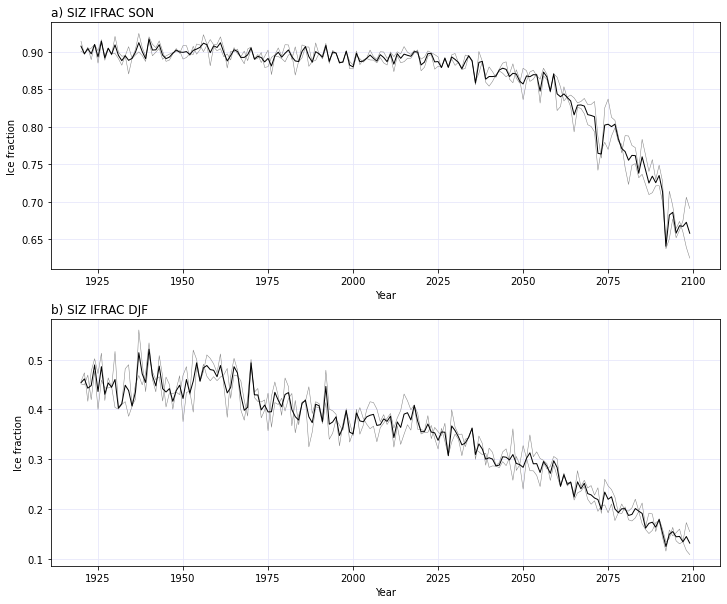

In [36]:
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(2,1,1)
ax.set_title('a) SIZ IFRAC SON', loc='left')

for mem in np.arange(0,2,1):
    ax.plot(ts_siz_son['time'], ts_siz_son['IFRAC'].isel(member_id=mem),linewidth=0.5,color='gray')
    
ax.plot(ts_siz_son['time'], ts_siz_son['IFRAC'].mean(dim='member_id'),linewidth=1,color='black')
        
ax.set(ylabel='Ice fraction',xlabel='Year');
ax.xaxis.grid(True, which='major',color='lavender')
ax.yaxis.grid(False, which='major',color='lavender');
################
ax = fig.add_subplot(2,1,2)
ax.set_title('b) SIZ IFRAC DJF', loc='left')

for mem in np.arange(0,2,1):
    ax.plot(ts_siz_djf['time'], ts_siz_djf['IFRAC'].isel(member_id=mem),linewidth=0.5,color='gray')
    
ax.plot(ts_siz_djf['time'], ts_siz_djf['IFRAC'].mean(dim='member_id'),linewidth=1,color='black')
        
ax.set(ylabel='Ice fraction',xlabel='Year');
ax.xaxis.grid(True, which='major',color='lavender')
ax.yaxis.grid(False, which='major',color='lavender');

### DJF sea ice appears to be drifting a lot after 1975, and NPP responds by increasing... hmmmmm
### Or maybe SST is drifting warming and sea ice and NPP are responding... hmmmm

### Make a change map from 1920s to 2090s

In [37]:
ds1 = ds.isel(time=slice(0,120)).mean(dim='time')

In [38]:
ds2 = ds.isel(time=slice(2040,2160)).mean(dim='time')

In [39]:
ds_jja.time[170]

<xarray.DataArray 'time' ()>
array(2090)
Coordinates:
    time     int64 2090

In [40]:
ifrac_jja_1920s = ds_jja.IFRAC.isel(time=slice(0,10)).mean(dim='time')

In [41]:
ifrac_jja_2090s = ds_jja.IFRAC.isel(time=slice(170,180)).mean(dim='time')

In [42]:
ds_diff = ds2 - ds1

In [43]:
ds_diff = ds_diff.load()

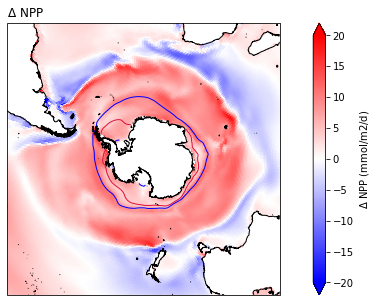

In [44]:
fig = plt.figure(figsize=(12,5))

############### 
ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
ax.set_title('${\Delta}$ NPP', loc='left')


lon,lat,field = utils.adjust_pop_grid(lons, lats, ds_diff.photoC_TOT_zint_100m.mean(dim='member_id') *86400.*0.01)

pc = ax.pcolormesh(lon,lat,field,
                    transform=ccrs.PlateCarree(),cmap='bwr',vmin=-20,vmax=20)

#### add SIZ contour 1920s
ice_lev = [0.85]
lon,lat,field = utils.adjust_pop_grid(lons, lats, ifrac_jja_1920s.mean(dim='member_id'))
cs = ax.contour(lon,lat,field, colors='blue',
                levels = ice_lev,
                linewidths = 1,
                transform=ccrs.PlateCarree())

#### add SIZ contour 2090s
ice_lev = [0.85]
lon,lat,field = utils.adjust_pop_grid(lons, lats, ifrac_jja_2090s.mean(dim='member_id'))
cs = ax.contour(lon,lat,field, colors='crimson',
                levels = ice_lev,
                linewidths = 1,
                transform=ccrs.PlateCarree())

ax.coastlines('10m',linewidth=1)
fig.colorbar(pc,extend='both', label='${\Delta}$ NPP (mmol/m2/d)');

### Make a couple climatologies

In [45]:
ds_clim1 = ds.isel(time=slice(0,120)).groupby('time.month').mean('time')
ds_clim2 = ds.isel(time=slice(2040,2160)).groupby('time.month').mean('time')

In [46]:
ds_clim1 = ds_clim1.load()
ds_clim2 = ds_clim2.load()

In [47]:
ts_siz_clim1920s = xr.Dataset()
ts_siz_clim2090s = xr.Dataset()


for var in variables:
    
    print(var)

    masked_area = area.where(SIZ_mask==1)

    ### 1920s
    masked_var = ds_clim1[var].where(SIZ_mask==1)
    ts_siz_clim1920s[var] = (masked_var * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))

    ### 2090s
    masked_var = ds_clim2[var].where(SIZ_mask==1)
    ts_siz_clim2090s[var] = (masked_var * masked_area).sum(dim=('nlon','nlat')) / masked_area.sum(dim=('nlon','nlat'))

photoC_TOT_zint_100m
POC_FLUX_100m
IFRAC


In [48]:
ts_siz_clim2090s

<xarray.Dataset>
Dimensions:               (member_id: 2, month: 12)
Coordinates:
  * month                 (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: member_id
Data variables:
    photoC_TOT_zint_100m  (month, member_id) float64 dask.array<chunksize=(12, 2), meta=np.ndarray>
    POC_FLUX_100m         (month, member_id) float64 dask.array<chunksize=(12, 2), meta=np.ndarray>
    IFRAC                 (month, member_id) float64 dask.array<chunksize=(12, 2), meta=np.ndarray>

In [49]:
ts_siz_clim1920s = xr.concat([ts_siz_clim1920s,ts_siz_clim1920s.isel(month=slice(0,6))],dim='month')
ts_siz_clim2090s = xr.concat([ts_siz_clim2090s,ts_siz_clim2090s.isel(month=slice(0,6))],dim='month')

In [50]:
xvals = [7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,18]

xlabels = ['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun']

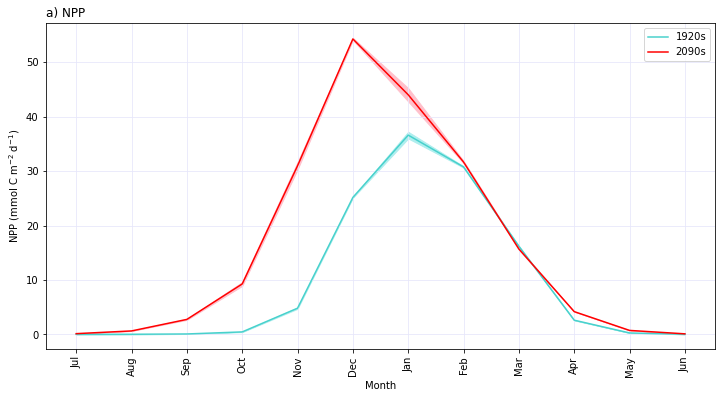

In [51]:
fig = plt.figure(figsize=(12,6))

convert=0.01*86400

ax1 = fig.add_subplot(1,1,1)
ax1.set_title('a) NPP',fontsize=12,loc='left')
ax1.set_ylabel('NPP (mmol C m$^{-2}$ d$^{-1}$)')
ax1.set_xlabel('Month')
#ax1.set_ylim(20,180)
ax1.xaxis.grid(True, which='major',color='lavender')
ax1.yaxis.grid(False, which='major',color='lavender')
#plot 1920
ax1.plot(xvals,ts_siz_clim1920s['photoC_TOT_zint_100m'].mean(dim='member_id').isel(month=slice(6,18))*convert, 
         color='mediumturquoise', label='1920s', lw=1.5)
error = ts_siz_clim1920s['photoC_TOT_zint_100m'].std(dim='member_id').isel(month=slice(6,18))*convert
ax1.fill_between(xvals, ts_siz_clim1920s['photoC_TOT_zint_100m'].mean(dim='member_id').isel(month=slice(6,18))*convert-error, 
                 ts_siz_clim1920s['photoC_TOT_zint_100m'].mean(dim='member_id').isel(month=slice(6,18))*convert+error,color='paleturquoise')


#plot 2090s
ax1.plot(xvals,ts_siz_clim2090s['photoC_TOT_zint_100m'].mean(dim='member_id').isel(month=slice(6,18))*convert, 
         color='red', label='2090s', lw=1.5)
error = ts_siz_clim2090s['photoC_TOT_zint_100m'].std(dim='member_id').isel(month=slice(6,18))*convert
ax1.fill_between(xvals, ts_siz_clim2090s['photoC_TOT_zint_100m'].mean(dim='member_id').isel(month=slice(6,18))*convert-error, 
                 ts_siz_clim2090s['photoC_TOT_zint_100m'].mean(dim='member_id').isel(month=slice(6,18))*convert+error,color='pink')

plt.xticks(xvals, xlabels, rotation='vertical')
ax1.legend();